# <center> Diffusion Processes on Complex Networks </center>
## <center> Roman Furman 255909 </center>

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm

In [8]:
def q_voter(G, MCS, N, p, q):
    """
    Simulates a voting process among individuals in a network using the q-voter model.
    
    Args:
        G (networkx.Graph): The graph representing the network of individuals.
        MCS (int): The number of Monte Carlo steps, determining the iterations of the voting process.
        N (int): The total number of individuals in the network.
        p (float): The probability of an individual independently changing their opinion (spin flip).
        q (int): The maximum number of neighbors an individual can interact with during the voting process.
        
    Returns:
        list: The evolution of the number of individuals with opinion 1 throughout the voting process.
    """
    
    opinions = [1] * N  # Initialize all individuals' opinions as 1
    opinions_in_time = [opinions.count(1)]  # Track the count of individuals with opinion 1 at each step
    
    for _ in range(MCS):  # Iterate over the Monte Carlo steps
        opinion_1_count = 0
        
        for spinson in range(N):  # Iterate over each individual
            
            a = random.random()
            
            if a < p:  # Independent spin flip may occur
                b = random.random()
                
                if b >= 0.5:  # Flip the opinion (1 to -1 or -1 to 1)
                    opinions[spinson] = -opinions[spinson]
            
            elif a >= p:  # No independent spin flip, interaction with neighbors
                neighbors = list(G.neighbors(spinson))
                kk = len(neighbors)
                qq = min(kk, q)
                q_panel = random.choices(neighbors, k=qq)  # Select q neighbors randomly
                
                opinions_panel = {opinions[k] for k in q_panel}  # Get the opinions of the selected neighbors
                
                if len(opinions_panel) == 1:  # Consensus reached
                    opinions[spinson] = opinions_panel.pop()
            
            if opinions[spinson] == 1:
                opinion_1_count += 1
        
        opinions_in_time.append(opinion_1_count)  # Add the count to the list
    
    return opinions_in_time[:-1]  # Return the evolution of opinion 1 count (excluding the last count)


In [32]:
# Define the networks
G_cp = nx.complete_graph(N)
G_ba = nx.barabasi_albert_graph(N, 4)
G_ws_001 = nx.watts_strogatz_graph(N, 4, 0.01)
G_ws_02 = nx.watts_strogatz_graph(N, 4, 0.2)

### Time Evolution of Magnetization for the WS(100,4,0.01) Network

In [33]:
# Define the parameter values
N = 100
q_value = 4 
p_values = [0.1, 0.25, 0.5]
MCS = 1000
num_of_traj = 100
time = np.linspace(0,MCS-1,MCS)

100%|█████████████████████████████████████████████| 3/3 [00:39<00:00, 13.20s/it]


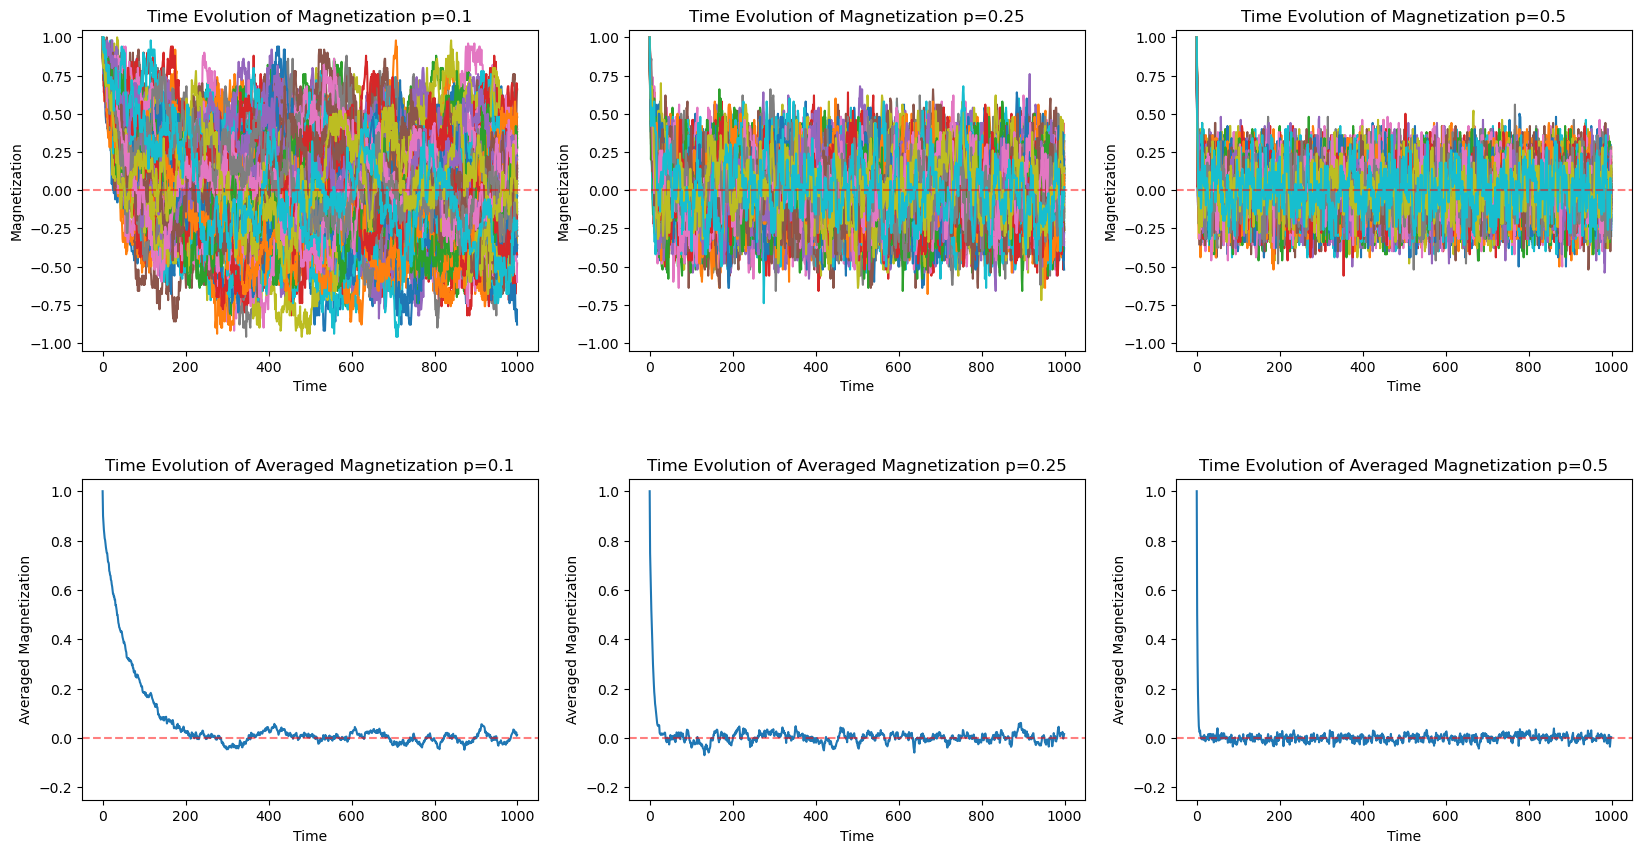

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4)

for j, p in enumerate(tqdm(p_values)):
    x = j // 3
    y = j % 3

    magnetization_avg_ws_list = []
    for _ in range(num_of_traj):
        opinions_in_time = q_voter(G_ws_001, MCS, N, p, q_value)
        ws_final_mag = [(k - (N - k)) / N for k in opinions_in_time]
        magnetization_avg_ws_list.append(ws_final_mag)
        axes[x,y].plot(time, ws_final_mag)
    axes[x, y].set_title(f"Time Evolution of Magnetization p={p}")
    axes[x, y].set_xlabel("Time")
    axes[x, y].set_ylabel("Magnetization")
    axes[x, y].set_ylim(-1.05, 1.05)
    axes[x, y].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    x += 1
    axes[x,y].plot(time ,np.mean(magnetization_avg_ws_list, axis=0))
    axes[x, y].set_title(f"Time Evolution of Averaged Magnetization p={p}")
    axes[x, y].set_xlabel("Time")
    axes[x, y].set_ylabel("Averaged Magnetization")
    axes[x, y].set_ylim(-0.25, 1.05)
    axes[x, y].axhline(y=0, color='red', linestyle='--', alpha=0.5)
   
plt.show()

The code snippet generates a plot to visualize the general behavior and evolution of magnetization over time in the WS(100,4,0.01) network. The plot consists of two rows and three columns of subplots, with each subplot representing a different `p` value.

In the top row of subplots, the magnetization values from individual runs are displayed. Each line represents the magnetization trajectory of a single run, showing how it changes over time. The y-axis represents the magnetization value, ranging from -1 to 1. The red dashed line at y=0 indicates the boundary between positive and negative magnetization.

In the bottom row of subplots, the averaged magnetization is plotted. The line represents the mean magnetization value across all runs at each time step. This provides an overall view of the magnetization behavior when averaging multiple runs. The y-axis ranges from -1 to 1, and the red dashed line at y=0 represents the point of zero magnetization.

By examining the plots, you can gain insights into the dynamics and trends of magnetization in the WS(100,4,0.01) network. The visualization helps in understanding how the opinions of individuals evolve and reach consensus over time, based on the specified q-voter model and network parameters.

### Average Final Magnetization as a function of Independence Factor (p) for q = 3 and Different Network Topologies

In [45]:
# Define the parameter values
N = 100
MCS = 1000
num_of_traj = 100
q_value = 3
p_values = np.arange(0,0.52,step=0.02)

In [46]:
cg_final_magn_list = []
ba_final_magn_list = []
ws_final_magn_list = []
for p_idx, p in enumerate(tqdm(p_values)):
    cg_magn_list = []
    ba_magn_list = []
    ws_magn_list = []
    for _ in range(num_of_traj):
        opinions_in_time_c = q_voter(G_cp, MCS, N, p, q_value)
        cg_final_mag = (opinions_in_time_c[-1] - (N-opinions_in_time_c[-1]) ) / N

        opinions_in_time_ba = q_voter(G_ba, MCS, N, p, q_value)
        ba_final_mag = (opinions_in_time_ba[-1] - (N - opinions_in_time_ba[-1]) ) / N

        opinions_in_time_ws = q_voter(G_ws_02, MCS, N, p, q_value)
        ws_final_mag = (opinions_in_time_ws[-1] - (N - opinions_in_time_ws[-1]) ) / N
        
        cg_magn_list.append(cg_final_mag)
        ba_magn_list.append(ba_final_mag)
        ws_magn_list.append(ws_final_mag)
        
    cg_final_magn_list.append(np.mean(cg_magn_list))
    ba_final_magn_list.append(np.mean(ba_magn_list))
    ws_final_magn_list.append(np.mean(ws_magn_list))

100%|███████████████████████████████████████████| 26/26 [20:19<00:00, 46.89s/it]


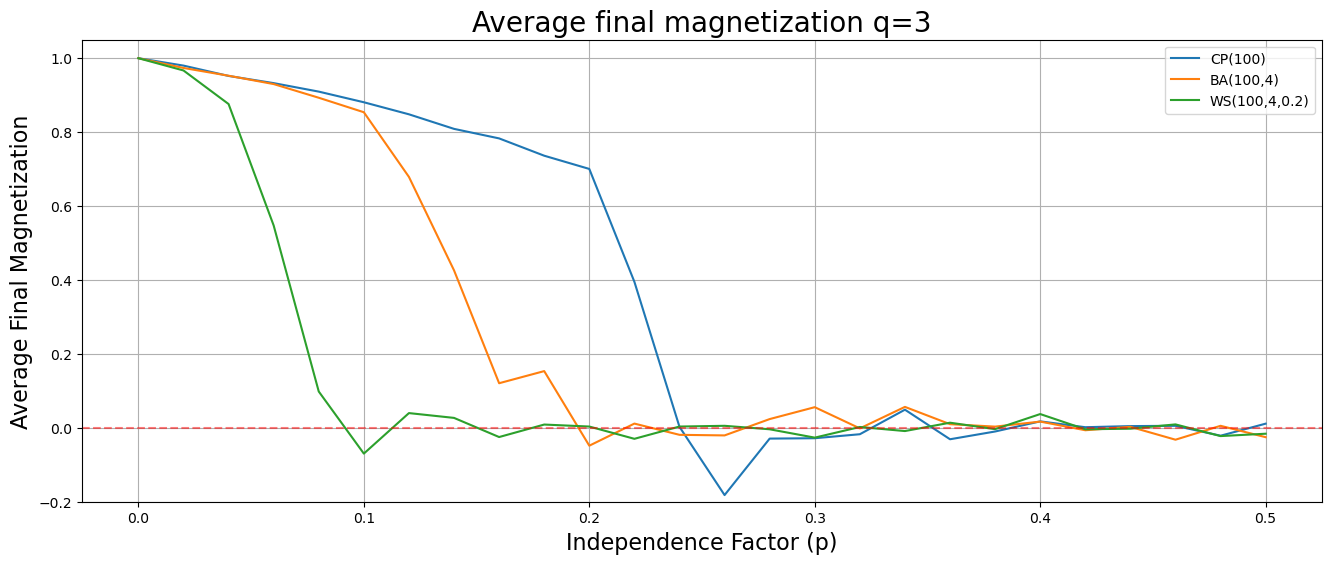

In [23]:
plt.rcParams["figure.figsize"] = (16,6)
plt.plot(p_values,cg_final_magn_list,label=f"CP({N})")
plt.plot(p_values,ba_final_magn_list,label=f"BA({N},4)")
plt.plot(p_values,ws_final_magn_list,label=f"WS({N},4,0.2)")
plt.title(f"Average final magnetization q={q_value}",fontsize=20)
plt.xlabel("Independence Factor (p)",fontsize=16)
plt.ylabel("Average Final Magnetization",fontsize=16)
plt.ylim(-0.2, 1.05)
plt.axhline(y=0, color='red', linestyle='--',alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

The provided code performs simulations and generates a plot to compare the average final magnetization across different network topologies (complete graph, Barabasi-Albert graph, and Watts-Strogatz graph) for varying values of the independence factor (`p`). The plot visualizes the relationship between the independence factor and the average final magnetization.

The code first sets the parameters, such as the number of individuals (`N`), the number of Monte Carlo steps (`MCS`), the number of independent runs (`num_of_traj`), the maximum number of neighbors an individual can interact with (`q_value`), and the range of independence factor values (`p_values`).

Next, it creates network graphs using different algorithms for the three network topologies: complete graph, Barabasi-Albert graph, and Watts-Strogatz graph. Each graph is assigned to a corresponding variable (`G_cp`, `G_ba`, `G_ws_001`, `G_ws_02`).

The code then initializes empty lists to store the average final magnetization values for each network topology (`cg_final_magn_list`, `ba_final_magn_list`, `ws_final_magn_list`).

Using nested loops, the code iterates over the independence factor values (`p_values`) and performs simulations for each network topology. Within the inner loop, the `q_voter` function is called with the specific parameters, and the resulting magnetization values over time are calculated for each network.

The final magnetization values for each run are averaged and appended to the respective magnetization lists. After completing the simulations, the code generates a plot using `plt.plot`. The plot displays the average final magnetization for each network topology as a function of the independence factor (`p`). The plot is customized with labels, a title, axes limits, a horizontal line at y=0, a legend, and grid lines.

Overall, the plot provides a visual representation of how the average final magnetization varies with the independence factor across different network topologies. It allows for a comparison of the network's structural characteristics and the impact of the independence factor on the consensus dynamics.

### Average Final Magnetization as a function of Independence Factor (p) for q = 4 and Different Network Topologies

In [42]:
# Define the parameter values
N = 100
MCS = 1000
num_of_traj = 100
q_value = 4
p_values = np.arange(0,0.52,step=0.02)

In [43]:
cg_final_magn_list_4 = []
ba_final_magn_list_4 = []
ws_final_magn_list_4 = []
for p_idx, p in enumerate(tqdm(p_values)):
    cg_magn_list_4 = []
    ba_magn_list_4 = []
    ws_magn_list_4 = []
    for _ in range(num_of_traj):
        opinions_in_time_c = q_voter(G_cp, MCS, N, p, q_value)
        cg_final_mag = (opinions_in_time_c[-1] - (N - opinions_in_time_c[-1]) ) / N

        opinions_in_time_ba = q_voter(G_ba, MCS, N, p, q_value)
        ba_final_mag = (opinions_in_time_ba[-1] - (N - opinions_in_time_ba[-1]) ) / N

        opinions_in_time_ws = q_voter(G_ws_02, MCS, N, p, q_value)
        ws_final_mag = (opinions_in_time_ws[-1] - (N - opinions_in_time_ws[-1]) ) / N
        
        cg_magn_list_4.append(cg_final_mag)
        ba_magn_list_4.append(ba_final_mag)
        ws_magn_list_4.append(ws_final_mag)
        
    cg_final_magn_list_4.append(np.mean(cg_magn_list_4))
    ba_final_magn_list_4.append(np.mean(ba_magn_list_4))
    ws_final_magn_list_4.append(np.mean(ws_magn_list_4))

100%|███████████████████████████████████████████| 26/26 [21:18<00:00, 49.19s/it]


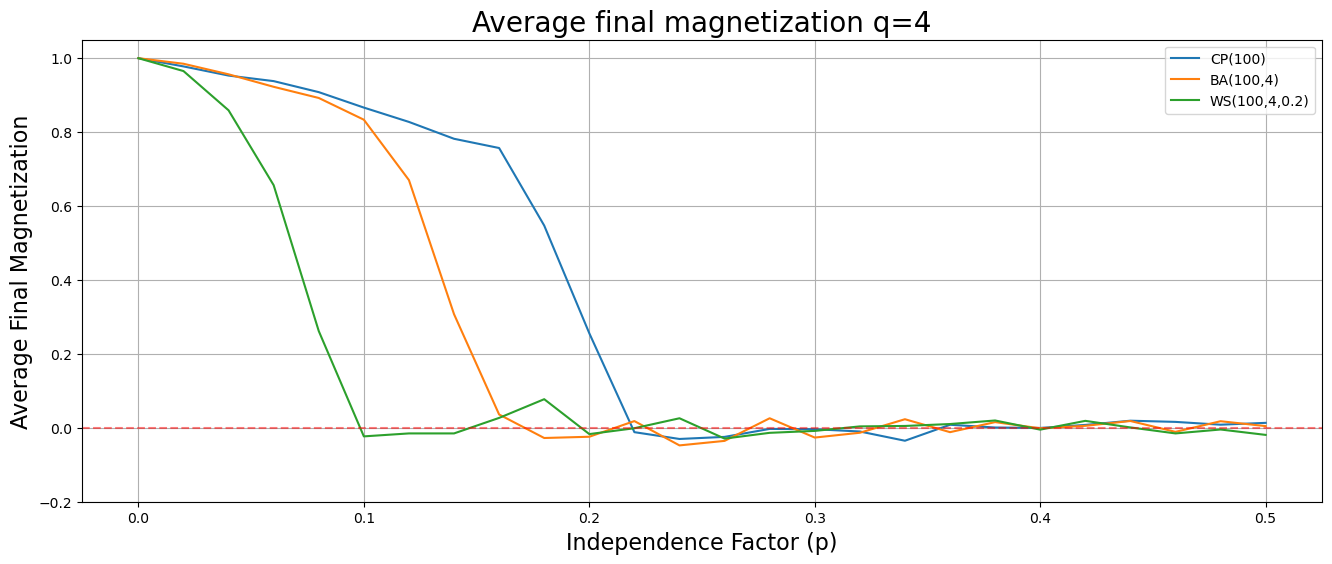

In [44]:
plt.rcParams["figure.figsize"] = (16,6)
plt.plot(p_values,cg_final_magn_list_4,label=f"CP({N})")
plt.plot(p_values,ba_final_magn_list_4,label=f"BA({N},4)")
plt.plot(p_values,ws_final_magn_list_4,label=f"WS({N},4,0.2)")
plt.title(f"Average final magnetization q={q_value}",fontsize=20)
plt.xlabel("Independence Factor (p)",fontsize=16)
plt.ylabel("Average Final Magnetization",fontsize=16)
plt.ylim(-0.2, 1.05)
plt.axhline(y=0, color='red', linestyle='--',alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

The code you provided calculates and visualizes the average final magnetization for different network models (`CP`, `BA`, `WS`) as a function of the independence factor (`p`). It performs simulations using the `q_voter` function, which models opinion dynamics on the networks.

Here's a general overview of the code:

1. It sets the parameter values, such as the network size (`N`), Monte Carlo steps (`MCS`), number of trajectories (`num_of_traj`), and the value of `q`.

2. It initializes empty lists (`cg_final_magn_list_4`, `ba_final_magn_list_4`, `ws_final_magn_list_4`) to store the average final magnetization values for the `CP`, `BA`, and `WS` networks, respectively.

3. It loops over the `p_values` range, displaying a progress bar using `tqdm`. Within this loop:

   a. It initializes inner lists (`cg_magn_list_4`, `ba_magn_list_4`, `ws_magn_list_4`) to store the final magnetization values for each network at each `p` value.
   
   b. It performs simulations using the `q_voter` function, calculating the final magnetization for each network and appending the values to the respective inner lists.
   
   c. After the inner loop, it computes the average final magnetization for each network using `np.mean` and appends the values to the respective outer lists.
   
4. It plots the average final magnetization values for the `CP`, `BA`, and `WS` networks against `p_values` using `plt.plot`. It also adds a title, labels for the x-axis and y-axis, a horizontal red dashed line at `y=0`, and a legend to the plot.

5. It displays the plot using `plt.show()`.

Overall, the code allows you to analyze and compare the behavior of opinion dynamics on different network models by examining the average final magnetization as the independence factor (`p`) varies.

### Average Final Magnetization as a function of Independence Factor (p) for WS(100,4,0.01) Network and Different Values of q

In [39]:
# Define the parameter values
N = 100
MCS = 1000
num_of_traj = 100
q_values = [3, 4]
p_values = np.arange(0,0.52,step=0.02)

q loop: 100%|████████████████████████████████████| 2/2 [12:41<00:00, 380.88s/it]


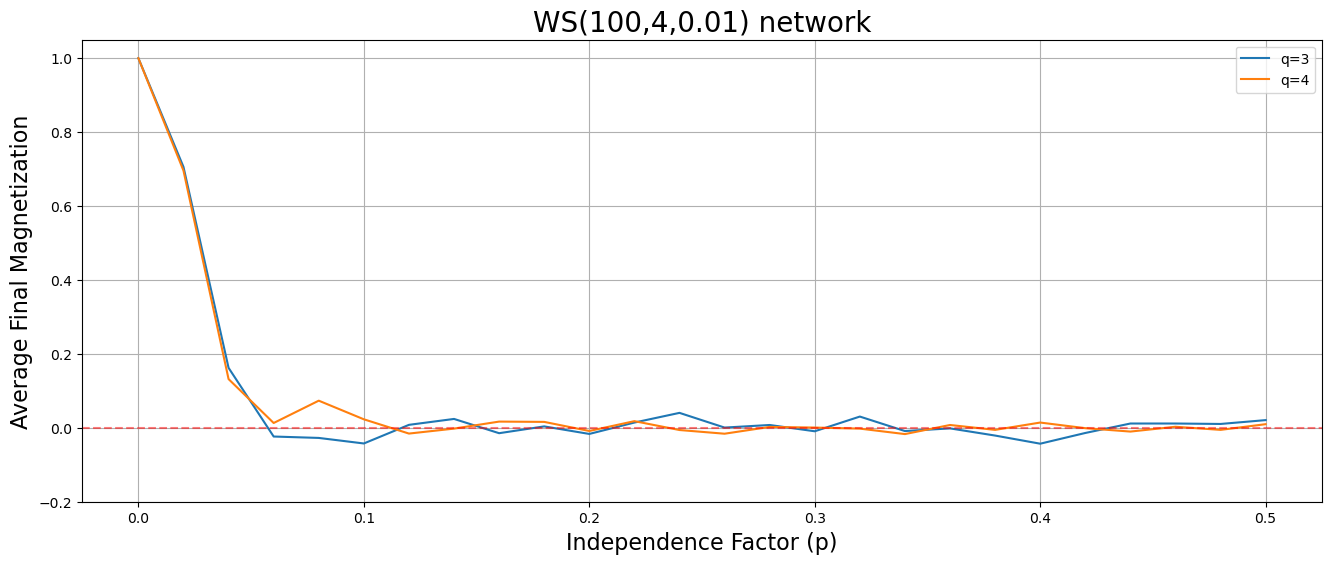

In [41]:
for q_idx, q in enumerate(tqdm(q_values, desc="q loop")):
    ws_final_magn_list_3_4 = []
    for p in tqdm(p_values, desc="p loop"):
        ws_magn_list_3_4 = []
        for _ in range(num_of_traj):
            opinions_in_time_ws = q_voter(G_ws_001, MCS, N, p, q_value)
            ws_final_mag = (opinions_in_time_ws[-1] - (N - opinions_in_time_ws[-1]) ) / N
            ws_magn_list_3_4.append(ws_final_mag)
        ws_final_magn_list_3_4.append(np.mean(ws_magn_list_3_4))
        
    plt.plot(p_values, ws_final_magn_list_3_4, label=f"q={q}")
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title("WS(100,4,0.01) network", fontsize=20)
plt.xlabel("Independence Factor (p)", fontsize=16)
plt.ylabel("Average Final Magnetization", fontsize=16)
plt.ylim(-0.2, 1.05)
plt.legend()
plt.grid(True)
plt.show()

The plot illustrates the average final magnetization as a function of the independence factor (`p`) for the WS(100,4,0.01) network, considering different values of `q`. Here's a description of what you can observe on the plot:

1. Average Final Magnetization Trend: The plot shows how the average final magnetization changes as the independence factor (`p`) varies. It allows you to analyze the influence of `p` on the final magnetization of the WS(100,4,0.01) network.

2. Multiple Lines for Different `q` Values: The plot contains multiple lines, each corresponding to a different value of `q`. By comparing these lines, you can examine how different levels of the local influence parameter (`q`) affect the average final magnetization.

3. Horizontal Reference Line: The horizontal dashed red line at `y=0` serves as a reference line, indicating the boundary between consensus and polarization. Points above the line suggest consensus, while points below the line indicate polarization.

4. Legend: The legend on the plot provides a key to identify which `q` value each line represents. It helps in distinguishing between different `q` values and facilitates understanding of the plot.

5. Title and Axes Labels: The title of the plot indicates the network model being analyzed (WS(100,4,0.01) network). The x-axis is labeled as the "Independence Factor (p)" and represents the range of `p` values considered. The y-axis is labeled as "Average Final Magnetization" and represents the average magnetization achieved in the final state of the network.

6. Y-axis Limits: The y-axis is scaled from -0.2 to 1.05, allowing you to observe the range of average final magnetization values achieved by the network.

7. Grid Lines: The grid lines on the plot aid in visually assessing the values of the average final magnetization for different `p` values and `q` values.

By analyzing the plot, you can gain insights into how the combination of the independence factor (`p`) and the local influence parameter (`q`) affects the average final magnetization of the WS(100,4,0.01) network. It provides a visual representation of the relationship between `p`, `q`, and the resulting magnetization, facilitating comparisons and conclusions about the impact of these parameters on opinion dynamics in the network.

## Task Summary and Conclusions:

1. Model Implementation:
   - The q-voter model with NN influence group was implemented based on the description in the paper by Jędrzejewski et al.
   - The model considers N = 100 agents and the independence factor `p`.
   - The social interaction networks used as underlying topologies were the complete graph, BA(100,4), WS(100,4,0.01), and WS(100,4,0.2).
   - Simulations were conducted for q = 3 and q = 4, with `p` ranging from 0.0 to 0.5 in steps of 0.02.
   - Each simulation ran for 1000 Monte Carlo steps.

2. Time Evolution of Magnetization for WS(100,4,0.01) Network:
   - The time evolution of magnetization for the WS(100,4,0.01) network was plotted.
   - The magnetization values were calculated for each Monte Carlo step and averaged over 100 independent runs.
   - The resulting plot provides insights into how the magnetization changes over time, both for individual runs and in terms of the averaged magnetization.

3. Average Final Magnetization as a Function of `p`:
   a. q = 3 and Different Network Topologies:
      - The average final magnetization was calculated for different network topologies (complete graph, BA(100,4), WS(100,4,0.01), WS(100,4,0.2)) with q = 3.
      - A plot was generated to visualize the relationship between the independence factor `p` and the average final magnetization for each network topology.

   b. q = 4 and Different Network Topologies:
      - The average final magnetization was calculated for different network topologies (complete graph, BA(100,4), WS(100,4,0.01), WS(100,4,0.2)) with q = 4.
      - A plot was generated to visualize the relationship between the independence factor `p` and the average final magnetization for each network topology.

   c. WS(100,4,0.01) Network and Different Values of `q`:
      - The average final magnetization was calculated for the WS(100,4,0.01) network with different values of `q`.
      - A plot was generated to observe how varying `p` influences the average final magnetization for different `q` values.

Overall, the task involved studying the q-voter model with independence on various network topologies. By analyzing the time evolution and average final magnetization, we gained insights into the impact of parameters such as `p` and `q` on opinion dynamics within the networks. The plots provided a visual representation of these relationships, enabling comparisons and conclusions about the behavior of the model under different conditions.